# DATASET INFORMATION

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
#Importing all the needed libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Printing the training side of data of flight

df=pd.read_csv('FLIGHT-TRAIN.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#Printing the testing side of the data of flight

dft=pd.read_csv('FLIGHT-TEST.csv')
dft

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
#Printing the shape of training data

df.shape

(10683, 11)

In [5]:
#Printing the shape of testing data

dft.shape

(2671, 10)

In [6]:
#Getting the information of the training data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#Getting the information of the testing data

dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
#There are little null values present in the training data

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#There are no null values present in the testing data

dft.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

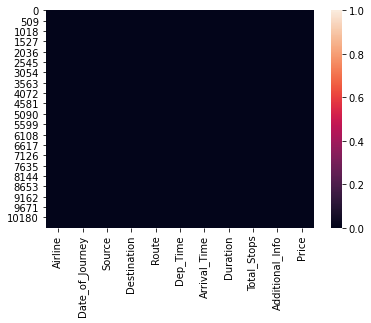

In [10]:
#Plotting the heatmap with training data

sns.heatmap(df.isnull())

<AxesSubplot:>

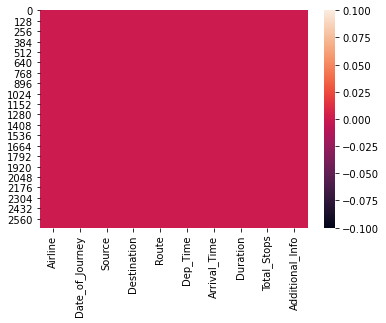

In [11]:
#Plotting the heatmap with testing data

sns.heatmap(dft.isnull())

# REMOVING MISSING VALUES FROM TRAINING DATA

In [12]:
#Removing the missing values from training side with the mode of the column

df["Route"] = df["Route"].fillna(df["Route"].dropna().mode().values[0] )

In [13]:
#Removing the missing values from testing side with thw mode of the column

df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].dropna().mode().values[0] )

In [14]:
#We have removed the null values from training side of the data

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
#Printing the unique values that are present in the column

df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [16]:
#Replacing the No Info with No info

df['Additional_Info'].replace('No Info', 'No info', inplace = True)

In [17]:
#Getting the unique values that are present in the column

dft.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [18]:
#Getting the description of the training data

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [19]:
#Getting the description of the testing data

dft.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [20]:
#Creating function for flight departure for timmings

def flight_departure_time(X):
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'midnight'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [21]:
df['flight_time'] = df['Dep_Time'].apply(flight_departure_time)

In [22]:
#Importing re

import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

# ENCODING THE COLUMNS

In [23]:
#Converting the columns with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

In [24]:
#Printing the dataframe

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_time,Duration(sec)
0,3,24,0,5,18,211,233,240,4,7,3897,1,10200
1,1,6,3,0,84,31,906,336,1,7,7662,2,26700
2,4,43,2,1,118,70,413,106,1,7,13882,3,68400
3,3,10,3,0,91,164,1324,311,0,7,6218,1,19500
4,3,0,0,5,29,149,1237,303,0,7,13302,0,17100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,7,4107,1,9000
10679,1,29,3,0,64,193,1305,237,4,7,4145,1,9300
10680,4,29,0,2,18,58,824,280,4,7,7229,3,10800
10681,10,0,0,5,18,92,938,238,4,7,12648,3,9600


In [25]:
#Converting the columns with DatetimeIndex

df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [26]:
#Printing the dataframe

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_time,Duration(sec),year,month,Day
0,3,24,0,5,18,211,233,240,4,7,3897,1,10200,1970,1,1
1,1,6,3,0,84,31,906,336,1,7,7662,2,26700,1970,1,1
2,4,43,2,1,118,70,413,106,1,7,13882,3,68400,1970,1,1
3,3,10,3,0,91,164,1324,311,0,7,6218,1,19500,1970,1,1
4,3,0,0,5,29,149,1237,303,0,7,13302,0,17100,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,7,4107,1,9000,1970,1,1
10679,1,29,3,0,64,193,1305,237,4,7,4145,1,9300,1970,1,1
10680,4,29,0,2,18,58,824,280,4,7,7229,3,10800,1970,1,1
10681,10,0,0,5,18,92,938,238,4,7,12648,3,9600,1970,1,1


In [27]:
#Dropping the columns

df.drop(['Date_of_Journey','Day','year','Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [28]:
#Printing the dataframe

df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,flight_time,Duration(sec),month
0,3,0,5,4,7,3897,1,10200,1
1,1,3,0,1,7,7662,2,26700,1
2,4,2,1,1,7,13882,3,68400,1
3,3,3,0,0,7,6218,1,19500,1
4,3,0,5,0,7,13302,0,17100,1
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,7,4107,1,9000,1
10679,1,3,0,4,7,4145,1,9300,1
10680,4,0,2,4,7,7229,3,10800,1
10681,10,0,5,4,7,12648,3,9600,1


In [29]:
#Dropping price

mid = df['Price']
df.drop(labels=['Price'], axis=1, inplace = True)
df.insert(0, 'Price', mid)
df.head()

,Price,Airline,Source,Destination,Total_Stops,Additional_Info,flight_time,Duration(sec),month
0,3897,3,0,5,4,7,1,10200,1
1,7662,1,3,0,1,7,2,26700,1
2,13882,4,2,1,1,7,3,68400,1
3,6218,3,3,0,0,7,1,19500,1
4,13302,3,0,5,0,7,0,17100,1


# DATA VISUALIZATION

# UNI-VARIET ANALYSIS

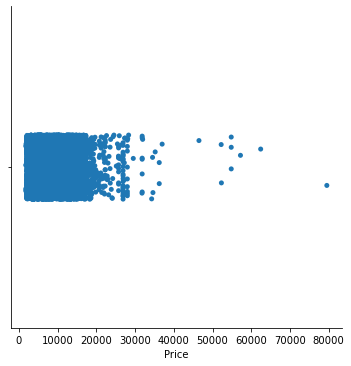

In [30]:
#Plotting catplot with our target column

sns.catplot(data=df,x='Price')

<AxesSubplot:xlabel='Price', ylabel='Density'>

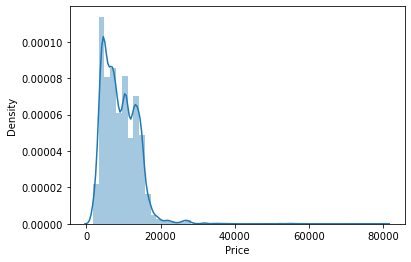

In [31]:
#Plotting the distribution plot of the target variable

sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price'>

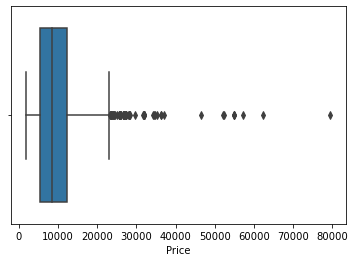

In [32]:
#There are outliers present in the Price column

sns.boxplot(data=df,x='Price')

<AxesSubplot:xlabel='Price'>

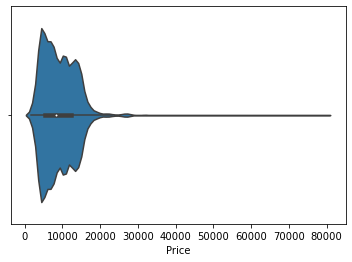

In [33]:
#Plotting violin plot

sns.violinplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

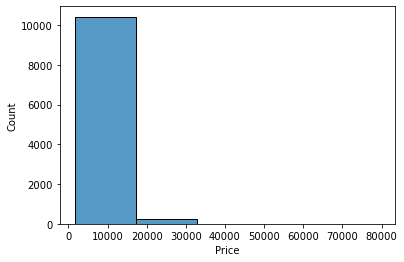

In [35]:
#Plotting histogram

sns.histplot(df['Price'],bins=5)

# CORELATION

In [36]:
#Showing co-relation between the columns

df.corr()

,Price,Airline,Source,Destination,Total_Stops,Additional_Info,flight_time,Duration(sec),month
Price,1.000000,-0.039520,0.015998,-0.071112,-0.571174,-0.063769,-0.003708,0.506495,NaN
Airline,-0.039520,1.000000,-0.013401,0.018479,0.036064,-0.077793,0.063999,-0.159879,NaN
Source,0.015998,-0.013401,1.000000,-0.592574,-0.225601,-0.015856,-0.089723,0.161977,NaN
Destination,-0.071112,0.018479,-0.592574,1.000000,0.337883,0.013089,0.072478,-0.257321,NaN
Total_Stops,-0.571174,0.036064,-0.225601,0.337883,1.000000,0.145884,-0.032454,-0.602359,NaN
Additional_Info,-0.063769,-0.077793,-0.015856,0.013089,0.145884,1.000000,0.023825,-0.152957,NaN
flight_time,-0.003708,0.063999,-0.089723,0.072478,-0.032454,0.023825,1.000000,-0.018011,NaN
Duration(sec),0.506495,-0.159879,0.161977,-0.257321,-0.602359,-0.152957,-0.018011,1.000000,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

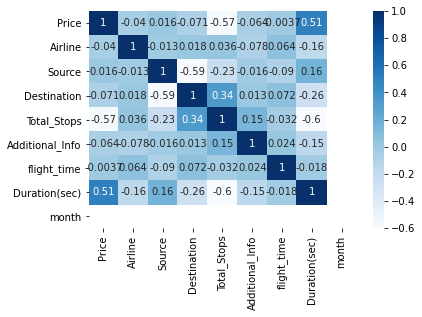

In [37]:
#Showing corelation
#Here the darker shades are highly corelated

sns.heatmap(df.corr(),annot=True,cmap='Blues')

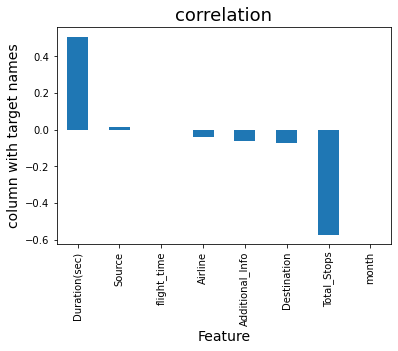

In [38]:
#Showing +vely & -vely corelation of the columns

df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# SKEWNESS

In [39]:
#Showing corelation of the columns that are present

df.skew()

Price              1.812552
Airline            0.731095
Source            -0.424054
Destination        1.244169
Total_Stops        0.631681
Additional_Info   -2.114551
flight_time       -0.118834
Duration(sec)      0.861203
month              0.000000
dtype: float64

In [40]:
#Treating the skewness

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [41]:
#Checking the skewness after removing skewness

df.skew()

Price             -0.254565
Airline           -0.679875
Source            -0.424054
Destination        0.283084
Total_Stops        0.466484
Additional_Info   -2.114551
flight_time       -0.118834
Duration(sec)     -0.164533
month              0.000000
dtype: float64

# DIVIDING THE X & Y

In [42]:
x=df.iloc[:,1:9]
x.shape
x

,Airline,Source,Destination,Total_Stops,Additional_Info,flight_time,Duration(sec),month
0,1.386294,0,1.791759,1.609438,7,1,9.230241,1
1,0.693147,3,0.000000,0.693147,7,2,10.192456,1
2,1.609438,2,0.693147,0.693147,7,3,11.133143,1
3,1.386294,3,0.000000,0.000000,7,1,9.878221,1
4,1.386294,0,1.791759,0.000000,7,0,9.746892,1
...,...,...,...,...,...,...,...,...
10678,0.000000,3,0.000000,1.609438,7,1,9.105091,1
10679,0.693147,3,0.000000,1.609438,7,1,9.137877,1
10680,1.609438,0,1.098612,1.609438,7,3,9.287394,1
10681,2.397895,0,1.791759,1.609438,7,3,9.169623,1


In [43]:
y=df.iloc[:,0:1]
y.shape
y

,Price
0,8.268219
1,8.944159
2,9.538420
3,8.735364
4,9.495745
...,...
10678,8.320692
10679,8.329899
10680,8.885994
10681,9.445333


# SCALING

In [44]:
#Importing the standard scaler for scaling the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

,0,1,2,3,4,5,6,7
0,-0.173359,-1.658441,1.897504,1.353931,0.49862,-0.536862,-1.063078,0.0
1,-1.484192,0.890052,-1.300469,0.088179,0.49862,0.275963,-0.003148,0.0
2,0.248636,0.040555,-0.063324,0.088179,0.49862,1.088788,1.033066,0.0
3,-0.173359,0.890052,-1.300469,-0.869325,0.49862,-0.536862,-0.349295,0.0
4,-0.173359,-1.658441,1.897504,-0.869325,0.49862,-1.349687,-0.493960,0.0


# MODELS

# LASSO

In [45]:
#Importing Lasso

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.0001}

In [48]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.0001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.5437143489473728
r2_score corresponding to random state:  43 is:  0.5574731598785303
r2_score corresponding to random state:  44 is:  0.537929101311208
r2_score corresponding to random state:  45 is:  0.5528912337635685
r2_score corresponding to random state:  46 is:  0.5763188813265534
r2_score corresponding to random state:  47 is:  0.5715786672411902
r2_score corresponding to random state:  48 is:  0.5643189902084818
r2_score corresponding to random state:  49 is:  0.5624432036687457
r2_score corresponding to random state:  50 is:  0.5784239420069871
r2_score corresponding to random state:  51 is:  0.5789463480223989
r2_score corresponding to random state:  52 is:  0.5552004185991818
r2_score corresponding to random state:  53 is:  0.5471994042108668
r2_score corresponding to random state:  54 is:  0.5734301822079584
r2_score corresponding to random state:  55 is:  0.557156095146093
r2_score corresponding to random state:  56 is:  0

# LINEAR REGRESSION

In [49]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

In [52]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.5437268350027947
r2_score corresponding to random state:  43 is:  0.557464937487516
r2_score corresponding to random state:  44 is:  0.5379205145195023
r2_score corresponding to random state:  45 is:  0.5529202200844595
r2_score corresponding to random state:  46 is:  0.5763175244415195
r2_score corresponding to random state:  47 is:  0.5716038853388898
r2_score corresponding to random state:  48 is:  0.5643450411265872
r2_score corresponding to random state:  49 is:  0.5624498742368644
r2_score corresponding to random state:  50 is:  0.5784256744684388
r2_score corresponding to random state:  51 is:  0.5789502284880186
r2_score corresponding to random state:  52 is:  0.5551930308337412
r2_score corresponding to random state:  53 is:  0.5471643038868472
r2_score corresponding to random state:  54 is:  0.5734202416377221
r2_score corresponding to random state:  55 is:  0.5571705434073796
r2_score corresponding to random state:  56 is:  

# KNEIGHBORS 

In [53]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 7}

In [54]:
knn= KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.8111907006737193
r2_score corresponding to random state:  43 is:  0.8250833044683551
r2_score corresponding to random state:  44 is:  0.8077397358327638
r2_score corresponding to random state:  45 is:  0.8223007396925887
r2_score corresponding to random state:  46 is:  0.8094814413850099
r2_score corresponding to random state:  47 is:  0.8120661668229134
r2_score corresponding to random state:  48 is:  0.8146757765906592
r2_score corresponding to random state:  49 is:  0.8198833247929473
r2_score corresponding to random state:  50 is:  0.828595368789081
r2_score corresponding to random state:  51 is:  0.8291110061923223
r2_score corresponding to random state:  52 is:  0.8227369280244666
r2_score corresponding to random state:  53 is:  0.793500285636929
r2_score corresponding to random state:  54 is:  0.8289696572745482
r2_score corresponding to random state:  55 is:  0.8117585147958296
r2_score corresponding to random state:  56 is:  0

# RANDOM FOREST

In [55]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 50}

In [56]:
rfr=RandomForestRegressor(bootstrap=True,max_features='log2',min_samples_split=8,n_estimators=50)
rfr.fit(x_train, y_train)
rfr.score(x_train,y_train)

0.8833533408898434

In [57]:
pred=rfr.predict(x_test)
pred

array([7.5837563 , 8.84035855, 9.49174528, ..., 8.87587141, 8.40430077,
       8.26696294])

In [59]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.20797131335109767
R-squared:  0.8350126376766716


# DECISION TREE

In [60]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [61]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=10)


{'max_depth': 10}

In [62]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [63]:
from math import sqrt
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.2014399078857596
R-squared:  0.8463285400460505


In [64]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.2163360685210381
R-squared:  0.8214739168790683


# CROSS-VALIDATION

In [67]:

from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest Regressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst Regressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())
print()
print()

Mean r2 score for Linear Regression:  0.5608854019254564
Standard Deviation r2 score for Linear Regression:  0.016486182802840966


Mean r2 score for knn:  0.8231870446627093
Standard Deviation r2 score for knn:  0.011148341003262004


Mean r2 score for R_forest Regressor  0.8345239447572667
Standard Deviation r2 score for R_forst Regressor  0.009374260499240672


Mean r2 score for lasso  0.56088566695688
Standard Deviation r2 score for lasso  0.016491220987638767




RANDOM FOREST IS OUR BEST MODEL IT IS GIVING US 88% ACCURACY

# SAVING THE MODEL

In [70]:
import joblib

In [71]:
joblib.dump(rfr,'FLIGHT-PRICE.obj')

['FLIGHT-PRICE.obj']

In [72]:
model=joblib.load('FLIGHT-PRICE.obj')

In [73]:
rfr.predict(x_test)

array([7.5837563 , 8.84035855, 9.49174528, ..., 8.87587141, 8.40430077,
       8.26696294])

In [ ]:
#END